# Exercise 2: Shallow and Deep Neural Networks

# Q1: The MNIST dataset

Below is a code to train a neural network on the MNIST dataset. The accuracy achieved is ~77%. Try to change the training process in order to improve the network's performance, the best you can.

You can change:

- The loss function.
- The batch size.
- The learning rate.

Try to tune these parameters in order to achive the best accuracy.

**Don't change the network or the number of epochs**.

**Note:** If you change the loss function, you might need to change relavant parts of the code accordingly.

In [102]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np

# Load MNIST dataset from torch datasets
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [103]:
# Define a network class
class SoftmaxNet(nn.Module):
    def __init__(self):
        super(SoftmaxNet, self).__init__()
        torch.manual_seed(0)
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = nn.Softmax(dim=1)(self.fc3(x))
        return x

In [104]:
# One-hot encoding
def one_hot_encode(labels):
    one_hot = torch.zeros(labels.shape[0], 10)
    one_hot[torch.arange(labels.shape[0]), labels] = 1
    return one_hot

In [105]:
def accuracy(net, test_loader):
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            outputs = net(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    return 100 * correct / total

In [110]:
softmax_net = SoftmaxNet()
criterion = nn.MSELoss()

def train(epochs,lr):
    optimizer = optim.SGD(softmax_net.parameters(), lr)
    LOSS = []
    for epoch in range(epochs):
        for data, target in train_loader:
            optimizer.zero_grad()
            output = softmax_net(data)
            loss = criterion(output, one_hot_encode(target))
            loss.backward()
            optimizer.step()
            LOSS.append(loss.item())
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')
    return LOSS

#train(15,lr)
#accuracy(softmax_net, test_loader)

Training with learning rate: 1e-06
Epoch 1, Loss: 0.0896
Epoch 2, Loss: 0.0908
Epoch 3, Loss: 0.0905
Epoch 4, Loss: 0.0900
Epoch 5, Loss: 0.0896
Epoch 6, Loss: 0.0903
Epoch 7, Loss: 0.0898
Epoch 8, Loss: 0.0900
Epoch 9, Loss: 0.0895
Epoch 10, Loss: 0.0899
Epoch 11, Loss: 0.0901
Epoch 12, Loss: 0.0900
Epoch 13, Loss: 0.0902
Epoch 14, Loss: 0.0902
Epoch 15, Loss: 0.0907
Accuracy: 5.83
------------------------------
Training with learning rate: 1e-05
Epoch 1, Loss: 0.0905
Epoch 2, Loss: 0.0894
Epoch 3, Loss: 0.0899
Epoch 4, Loss: 0.0897
Epoch 5, Loss: 0.0900
Epoch 6, Loss: 0.0898
Epoch 7, Loss: 0.0898
Epoch 8, Loss: 0.0901
Epoch 9, Loss: 0.0899
Epoch 10, Loss: 0.0895
Epoch 11, Loss: 0.0896
Epoch 12, Loss: 0.0905
Epoch 13, Loss: 0.0895
Epoch 14, Loss: 0.0903
Epoch 15, Loss: 0.0894
Accuracy: 5.95
------------------------------
Training with learning rate: 0.0001
Epoch 1, Loss: 0.0899
Epoch 2, Loss: 0.0904
Epoch 3, Loss: 0.0899
Epoch 4, Loss: 0.0907
Epoch 5, Loss: 0.0896
Epoch 6, Loss: 0.090

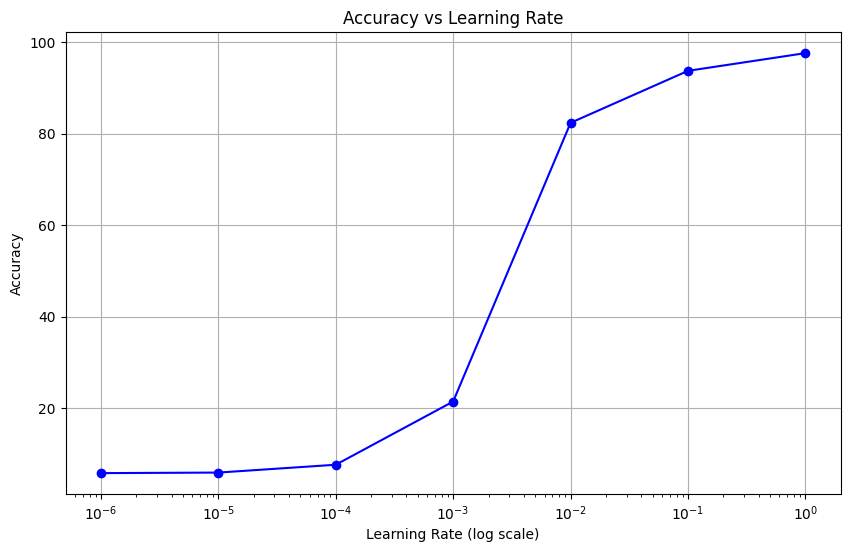

In [111]:
import matplotlib.pyplot as plt

# Define the list of learning rates
learning_rates = [0.000001, 0.00001, 0.0001,0.001,0.01,0.1,1]

# Initialize a list to store accuracies for each learning rate
accuracies = []

# Loop over each learning rate
for lr in learning_rates:
    print(f"Training with learning rate: {lr}")

    # Train the model
    train(15, lr)

    # Get the accuracy of the model on the test set
    acc = accuracy(softmax_net, test_loader)  # Calculate accuracy using the test set

    # Print the accuracy for this learning rate
    print(f"Accuracy: {acc}")
    print("-" * 30)

    # Append the accuracy to the list
    accuracies.append(acc)

# Plotting the accuracies for each learning rate
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, accuracies, marker='o', linestyle='-', color='b')
plt.xscale('log')  # Use logarithmic scale for better visualization
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Learning Rate')
plt.grid(True)
plt.show()


# Q2: XOR functions

Train a neural network for the XOR dataset (see below). Experiment with different input sizes ($n=4,8,...$). We aim to work
with inputs having $n=16$ bits, or more. Our goals in this exercise are:

1. Train a neural network to achieve best accuracy on the XOR dataset. For this purpose choose the best networks by tuning, at least a subset, of the follwing parameters:

  - The input representation (e.g., 0/1 or 1/-1).
  - Number of layers.
  - Number of neurons in each layer.
  - Choice of activation function(s).
  - Batch size, for the mini-batch algorithm.
  - Number of epochs.
  - Learning rate.

Note: When you change one parameter you might need to re-tune a parameter you already tuned. For example, if you change the batch size, you might want to consider a different choice for the learning rate. Or, if you take a bigger network, you might want to use less epochs, etc.

2. Study, and demonstrate:
  
  - The effect of the number of layers on the number of neurons needed, and the accuracy attained.
  - The effect of the batch size in the minibatch gradient descent algorithm.
  - The effect of the batch size on the learning rate and other network parameters.
  - How the problem changes when the number of input bits grow.

3. On your final network, try to interpret the representation in the different hidden layers.

If needed you can apply any of the regularization methods we have learned.

Note: If you work with very large $n$, you will not be able to generate all possible 0/1 vectors, and you need to construct the dataset differently. Also, in this case it might be necessary to work with regularization.

## The dataset

In [31]:
import torch
import numpy as np
import pandas as pd

In [32]:
import itertools as it
class XORDataset(torch.utils.data.Dataset):

    @staticmethod
    def random_seubset(m, p=0.7):
        np.random.seed(0)
        return (np.random.uniform(0, 1, m) <= p).astype(int)

    # Generate all 0/1 vectors of length n
    @staticmethod
    def generate(n):
        return list(it.product(*[range(x + 1) for x in [1] * n]))

    def __init__(self, n=16, Train=True):

        all = self.generate(n)
        a = self.random_seubset(2**n)
        if Train:
            self.X = torch.tensor(np.array(all)[a == 1])
        else:
            self.X = torch.tensor(np.array(all)[a == 0])

        self.Y = self.X.sum(dim=1) % 2

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

In [100]:
import torch
import torch.nn as nn
import torch.optim as optim
import itertools as it
import numpy as np

class XORDataset(torch.utils.data.Dataset):

    @staticmethod
    def random_subset(m, p=0.7):
        np.random.seed(0)
        return (np.random.uniform(0, 1, m) <= p).astype(int)

    # Generate all 0/1 vectors of length n
    @staticmethod
    def generate(n):
        return list(it.product(*[range(x + 1) for x in [1] * n]))

    def __init__(self, n=16, Train=True):
        all = self.generate(n)
        a = self.random_subset(2**n)
        if Train:
            self.X = torch.tensor(np.array(all)[a == 1])
        else:
            self.X = torch.tensor(np.array(all)[a == 0])
        self.Y = self.X.sum(dim=1) % 2

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

class XORNet(nn.Module):
    def __init__(self, input_size):
        super(XORNet, self).__init__()
        torch.manual_seed(0)  # For reproducibility

        # Define three hidden layers with ReLU activation
        self.fc1 = nn.Linear(input_size, 80)   # First hidden layer
        self.fc2 = nn.Linear(80, 80)           # Second hidden layer
        self.fc3 = nn.Linear(80, 80)           # Third hidden layer
        self.fc4 = nn.Linear(80, 1)            # Output layer (1 neuron for binary classification)

    def forward(self, x):
        # Forward pass through the network
        x = torch.relu(self.fc1(x))  # First hidden layer with ReLU
        x = torch.relu(self.fc2(x))  # Second hidden layer with ReLU
        x = torch.relu(self.fc3(x))  # Third hidden layer with ReLU
        x = torch.sigmoid(self.fc4(x))  # Sigmoid for binary output
        return x

# Accuracy function on test data
def compute_accuracy(model, test_loader):
    model.eval()  # Ensure the model is in evaluation mode (not training)
    correct = 0
    total = 0

    with torch.no_grad():  # No need to compute gradients during accuracy calculation
        for inputs, labels in test_loader:
            inputs = inputs.float()
            labels = labels.float()
            outputs = model(inputs)

            # Convert outputs to binary predictions (0 or 1)
            predicted = (outputs.view(-1) > 0.5).float()  # If output > 0.5, consider it as 1, otherwise 0

            correct += (predicted == labels.view(-1)).sum().item()  # Count matches
            total += labels.size(0)  # Count the total number of examples

    accuracy = 100 * correct / total  # Accuracy in percentage
    return accuracy

# Generate XOR data with n=16
train_dataset = XORDataset(n=16, Train=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)

test_dataset = XORDataset(n=16, Train=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=False)

# Define the model, loss function, and optimizer
model = XORNet(input_size=16)  # Inputs are size 16 for XOR
criterion = nn.BCELoss()  # BCE loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Moderate learning rate

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()  # Indicate the model is in training mode
    for inputs, labels in train_loader:
        inputs = inputs.float()  # Convert inputs to float
        labels = labels.float()  # Convert labels to float
        optimizer.zero_grad()  # Reset gradients
        outputs = model(inputs)  # Compute model outputs
        loss = criterion(outputs.view(-1), labels.view(-1))  # Compute loss
        loss.backward()  # Compute gradients
        optimizer.step()  # Update model parameters

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Calculate accuracy after training
accuracy = compute_accuracy(model, test_loader)
print(f"Test Accuracy after training: {accuracy:.2f}%")


Epoch [1/10], Loss: 0.6449
Epoch [2/10], Loss: 0.4647
Epoch [3/10], Loss: 0.0001
Epoch [4/10], Loss: 0.0000
Epoch [5/10], Loss: 0.0000
Epoch [6/10], Loss: 0.0000
Epoch [7/10], Loss: 0.0000
Epoch [8/10], Loss: 0.0000
Epoch [9/10], Loss: 0.0000
Epoch [10/10], Loss: 0.0000
Test Accuracy after training: 99.96%


## Example of a small XOR dataset

In [9]:
data = XORDataset(3)

In [10]:
data.X

tensor([[0, 0, 0],
        [0, 1, 0],
        [0, 1, 1],
        [1, 0, 0],
        [1, 0, 1],
        [1, 1, 0]])

In [11]:
data.Y

tensor([0, 1, 0, 1, 0, 0])

In [115]:
data_val = XORDataset(3, Train=False)

In [116]:
data_val.X

tensor([[0, 0, 1],
        [1, 1, 1]])

In [117]:
data_val.Y

tensor([1, 1])